In [2]:
import tsunamibayes as tb
import numpy as np

SyntaxError: invalid syntax (<ipython-input-2-fd2b3f84ddb4>, line 1)

# Testing Haversine (Distance Between Points on Globe)

In [4]:
R = 6.3781e6    #Radius of the earth
lat1 = 50.06638889    #Just two random lat/lon coordinates for testings purposes
lon1 = 5.71472222
lat2 = 58.64388889
lon2 = 3.070000
distance = haversine(lat1,lon1,lat2,lon2)
distance/10000      #This is the correct distance according to some other distance calculators found on Google.

96.993326104622071

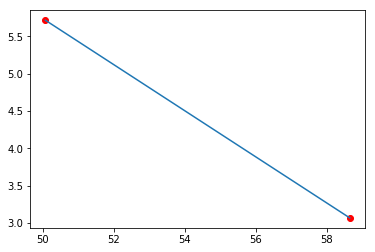

In [5]:
import matplotlib.pyplot as plt
pointsx = [lat1, lat2]
pointsy = [lon1, lon2]
plt.plot(pointsx, pointsy, 'ro')
plt.plot(pointsx,pointsy)
plt.show()

# Creat a Reference Curve Fault Object

In [8]:
import pandas as pd     #Pandas is the library that contains some useful objects/functions for storing and organizing data.

df = pd.read_excel ('Flores.xlsx')     #df stands for data frame for the Flores fault.
dfwalinae = pd.read_excel('Walinae.xlsx')    #the data frame containing the coordinates for the Walinae fault. 
print(dfwalinae)
print (df)

     OBJECTID  Shape_Length     START_X   START_Y       END_X     END_Y  \
0           1      0.008964  120.519996 -6.794426  120.523974 -6.786393   
1           2      0.008964  120.523974 -6.786393  120.527912 -6.778340   
2           3      0.008964  120.527912 -6.778340  120.531808 -6.770267   
3           4      0.008964  120.531808 -6.770267  120.535664 -6.762174   
4           5      0.008964  120.535664 -6.762174  120.539478 -6.754062   
5           6      0.008964  120.539478 -6.754062  120.543249 -6.745929   
6           7      0.008964  120.543249 -6.745929  120.546979 -6.737778   
7           8      0.008964  120.546979 -6.737778  120.550666 -6.729607   
8           9      0.008964  120.550666 -6.729607  120.554309 -6.721417   
9          10      0.008964  120.554309 -6.721417  120.557910 -6.713207   
10         11      0.008964  120.557910 -6.713207  120.561466 -6.704979   
11         12      0.008964  120.561466 -6.704979  120.564979 -6.696732   
12         13      0.0089

In [20]:
df.axes

[RangeIndex(start=0, stop=809, step=1),
 Index(['OBJECTID', 'Shape_Length', 'START_X', 'START_Y', 'END_X', 'END_Y',
        'AZIMUTH', 'CenterLong', 'CenterLat', 'Strike'],
       dtype='object')]

In [21]:
latpoints = df.iloc[:,8]    #We slice here the important information: lat/lon/strike coordinates. We don't really use the other columns according to my knowledge
lonpoints = df.iloc[:,7]    
strikepts = df.iloc[:,9]
latpoints2 = dfwalinae.iloc[:,8]
lonpoints2 = dfwalinae.iloc[:,7]
strikepts2 = dfwalinae.iloc[:,9]

#From what I understand, these slices are not numpy Arrays, they still contain the column title/index.


In [22]:
latpoints = latpoints.values      #Values changes the columns that we sliced into a array that we can use in graphing.
lonpoints = lonpoints.values      
strikepts = strikepts.values
latpoints2 = latpoints2.values
lonpoints2 = lonpoints2.values
strikepts2 = strikepts2.values

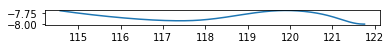

In [23]:
plt.plot(lonpoints, latpoints)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()
#Flores fault lat/lon. 

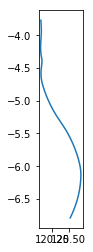

In [24]:
plt.plot(lonpoints2, latpoints2)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()
#Walinae fault lat/lon...
#This one will be a little weirder to make sure we don't have weird discontinuties when we interpolate the strike angle.

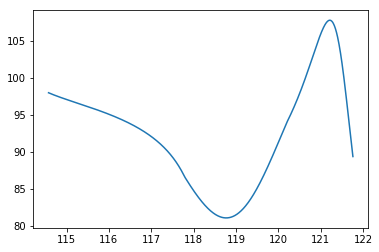

In [25]:
plt.plot(lonpoints, strikepts)
plt.show()

In [26]:
#Creating the bounds for our fault object.
minlat = latpoints.min()
maxlat = latpoints.max()
minlon = lonpoints.min()
maxlon = lonpoints.max()
[minlat,
minlon,
maxlat,
maxlon]


[-8.0025921586169488,
 114.5744529879782,
 -7.6806788868203171,
 121.7595906871211]

In [27]:
bounds = {'lon_min' : minlon,'lon_max' : maxlon,
            'lat_min' : minlat, 'lat_max':maxlat}

In [1]:
bounds

NameError: name 'bounds' is not defined

In [2]:
#Using some test dip/depth curves. Essentially we assume that the dip/depth are constant throughout. 

depthcurve = lambda depth : 25*1000
dipcurve = lambda dip : 25

In [3]:
testCurve = fault.ReferenceCurveFault(latpoints,lonpoints,strikepts,depthcurve,dipcurve,bounds)
testCurve
#Hey, it works! 

NameError: name 'fault' is not defined

# Test the Quad_Interp Function

In [ ]:
x = np.array([1,2,3])
y = np.array([100,-3,25])

In [ ]:
fault.ReferenceCurveFault.quad_interp(x,y)

In [ ]:
#Make sure to always use numPy arrays here!!!

x = np.array([1,2,3])
y = np.array([100,-3,25])
cof= fault.ReferenceCurveFault.quad_interp(x,y)

graphx = np.linspace(1,3,100)
graphx = np.array(graphx)
graphy = cof[0]*graphx**2 + cof[1]*graphx + cof[2]
plt.plot(x,y,'ro')
plt.plot(graphx, graphy)
plt.show()

# Testing the Creation of Depth/Dip Curves

In [ ]:
#I just copied the function here because the notebook wouldn't recongize the fault.quad_interp() function

def depth_dip_curves(x,y,surf_dist):
        """Returns callable functions for the depth and dip curves passing through
        three points.

        Parameters
        ----------
        x : (3,) ndarray
            Distances from fault refernce points, in meters
        y : (3,) ndarray
            Depth values
        surf_dist : float
            Distance from fault reference points to the fault's intersection with
            the Earth's surface

        Returns
        -------
        depth_curve : (function)
            The callable function that accepts one positional arugment (ie. x)
            and returns the quadratic depth curve passing through the 3 specified points.
        dip_curve : (function)
            The callable function that accepts one positional arugment (ie. x)
            and returns the quadratic dip curve passing through the 3 specified points.
        """
        c = fault.ReferenceCurveFault.quad_interp(x,y) #This line doesn't like it when we call it with the class
        depth_curve = lambda x: (c[0]*x**2 + c[1]*x + c[2])*(x > -np.abs(surf_dist))
        dip_curve = lambda x: np.degrees(np.arctan(2*c[0]*x + c[1]))*(x > -np.abs(surf_dist))
        return depth_curve, dip_curve

In [ ]:
#Some debugging to do here...

xtest = np.array([-5,10,15])
ytest = np.array([20,25,30])
depthcurve, dipcurve = fault.ReferenceCurveFault.depth_dip_curves(xtest,ytest,20)

In [ ]:
xplot = np.linspace(0,20,100)
yplotdepth = depthcurve(xplot)
yplotdip = dipcurve(xplot)
plt.plot(xplot,yplotdepth,'b')
plt.plot(xplot,yplotdip,'r')
plt.show()

# Test Circ Mean (weighted mean of various angles)

In [ ]:
#I simply gave each point a weight of 1 here.
weights = [1] * len(strikepts)
weigths = np.array(weights)
fault.ReferenceCurveFault.circmean(strikepts,weights)

# Testing the Side Method

### We may need to double check the math on this...it appears a little finnicky

In [ ]:
#Here I just tested with a random index of a point along the Flores fault. 
#I also just choose an arbitrary "closest point" just to understand how the function worked.
i = 475
closelat = latpoints[i]
closelon = lonpoints[i]
closestrike = strikepts[i]
closepoint = [closelat, closelon,closestrike]
closepoint

In [ ]:
#This is the point for which we seek to find whether it's on the dipward or antidipward side.
testlat,testlon = [-7.9, 118.9]
fault.ReferenceCurveFault.side(testlat,testlon,closelat,closelon,closestrike)

In [ ]:
plt.plot(closelon,closelat,'ro')
plt.plot(lonpoints, latpoints)
plt.plot(testlon, testlat, 'bx')
plt.show()

In [ ]:
testPointslat = np.array([latpoints[1]])
testPointslon = np.array([lonpoints[1]])

In [ ]:
#Would this distance function need to be called with an equal number of array elements or just a single value???
minDistance, iminDist = distance(testPointslat, testPointslon, retclose = True)

In [ ]:
np.array([testPointslat, testPointslon])

In [ ]:
np.array([latpoints[iminDist],lonpoints[iminDist]])

In [ ]:
fault.ReferenceCurveFault.side(testPointslat,testPointslon,latpoints[iminDist],lonpoints[iminDist], strikepts[iminDist])

# Testing Distances Function

In [ ]:
testlat,testlon = [-7.9, 118.9]

In [ ]:
distance(testlat,testlon)

In [ ]:
distance(testlat, testlon, retclose = True)

In [ ]:
distance((latpoints+.1), (lonpoints+.1), retclose = True)

In [ ]:
testlat,testlon = [-7.9, 118.9]
fault.ReferenceCurveFault.side(testlat,testlon,latpoints[482],lonpoints[482],strikepts[482])

In [ ]:
plt.plot(lonpoints[482],latpoints[482],'ro')
plt.plot(lonpoints, latpoints)
plt.plot(testlon, testlat, 'bx')
ax = plt.gca()
ax.set_aspect('equal')
plt.show()